In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
(X_train,y_train), (X_test,y_test)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
def preprocess_image(images):
    images = images/255
    return images
X_train = preprocess_image(X_train)
X_test = preprocess_image(X_test)

In [6]:
model = Sequential()
model.add(InputLayer((28, 28)))
model.add(Flatten())
model.add(Dense(32, 'relu'))
model.add(Dense(10))
model.add(Softmax())
model.compile(loss='sparse_categorical_crossentropy', metrics= ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
 softmax (Softmax)           (None, 10)                0         
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [7]:
save_cp = ModelCheckpoint('model', save_best_only=True)
history_cp = tf.keras.callbacks.CSVLogger('history.csv', separator=',')
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=5, callbacks=[save_cp, history_cp])

Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.3490 - accuracy: 0.9036 - val_loss: 0.2135 - val_accuracy: 0.9394
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1995 - accuracy: 0.9438 - val_loss: 0.1725 - val_accuracy: 0.9500
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1635 - accuracy: 0.9535 - val_loss: 0.1527 - val_accuracy: 0.9571
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1425 - accuracy: 0.9599 - val_loss: 0.1442 - val_accuracy: 0.9615
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1273 - accuracy: 0.9652 - val_loss: 0.1375 - val_accuracy: 0.9630


In [8]:
import pandas as pd 
import matplotlib.pyplot as plt

history = pd.read_csv('history.csv')
history.head()


,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.903583,0.348970,0.9394,0.213462
1,1,0.943800,0.199476,0.9500,0.172454
2,2,0.953450,0.163463,0.9571,0.152662
3,3,0.959900,0.142516,0.9615,0.144246
4,4,0.965167,0.127289,0.9630,0.137512


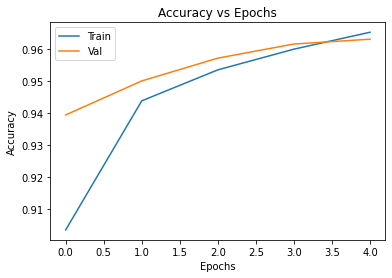

In [9]:
fig = plt.figure()
plt.plot(history['epoch'], history['accuracy'])
plt.plot(history['epoch'], history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])
plt.show()